## Time Series EDA (Practice)
Let's examine a real-world example of a random walk. Daily stock prices are a great example. This is the daily stock closing price for Microsoft.

After loading in the data,

0) Convert the Date column to datetime dtype and make the index.

1) Resample the data as business days "B".

2) Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

3) Visualize the time series.

5) Check for stationarity with the Ad Fuller Test.

6) Check for autocorrelation with an ACF plot.

7) Difference the data once.

8) Visualize the differenced data.

9) Check the differenced data for stationarity with the Ad Fuller Test.

10) Check the differenced data for autocorrelation with an ACF Plot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import  statsmodels.tsa.api as tsa # new import
from sklearn import set_config
#set_config(transform_output="pandas")
plt.rcParams["figure.figsize"] = (12, 4)
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)

In [2]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [4]:
# Load Data
df = pd.read_csv('Data/stock_prices.csv')
df.head()

,Date,Closing Price
0,2010-01-04,30.950001
1,2010-01-05,30.959999
2,2010-01-06,30.770000
3,2010-01-07,30.450001
4,2010-01-08,30.660000


#### 0. Convert the Date column to datetime dtype and make the index.

In [5]:
# Convert Date column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1258 non-null   datetime64[ns]
 1   Closing Price  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [6]:
# Change Date to index
df = df.set_index('Date')
df.head()

,Closing Price
Date,
2010-01-04,30.950001
2010-01-05,30.959999
2010-01-06,30.770000
2010-01-07,30.450001
2010-01-08,30.660000


#### 1. Resample the data as business days "B".

In [7]:
# Resample to business day
ts = df['Closing Price'].resample('B').asfreq()
ts

Date
2010-01-04    30.950001
2010-01-05    30.959999
2010-01-06    30.770000
2010-01-07    30.450001
2010-01-08    30.660000
                ...    
2014-12-25          NaN
2014-12-26    47.880001
2014-12-29    47.450001
2014-12-30    47.020000
2014-12-31    46.450001
Freq: B, Name: Closing Price, Length: 1303, dtype: float64

#### 2. Check for missing values and impute if necessary. (for stock data, you should forward-fill the missing values).

In [8]:
# Check for nulls
ts.isna().sum()

45

In [11]:
# Forward fill the stock data
ts = ts.fillna(method='ffill')
ts.isna().sum()

0

#### 3. Visualize the time series.

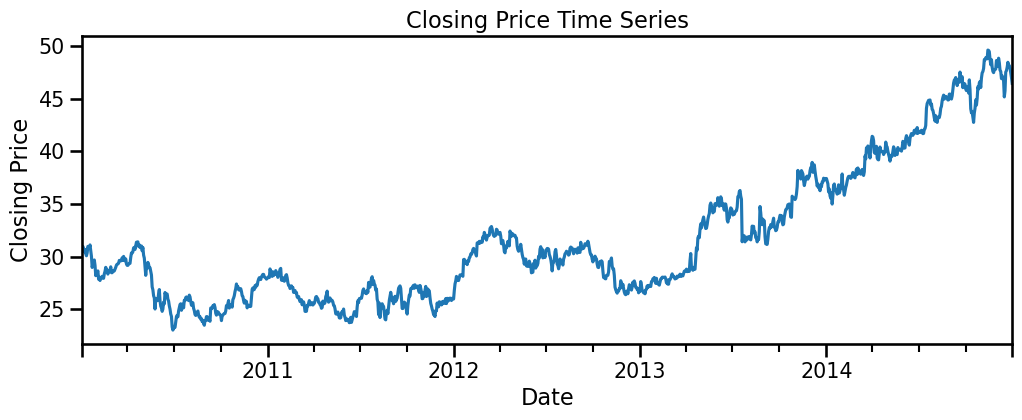

In [25]:
# Plot the time series
ts.plot(title='Closing Price Time Series', ylabel='Closing Price');

#### 4. Check for stationarity with the Ad Fuller Test.

In [26]:
# Check for stationarity with adfuller
adfuller_results = get_adfuller_results(ts, label='Closing Price')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
Closing Price,-0.10329,0,1302,0.94911,0.05,False


The time series data is not stationary.

#### 5. Check for autocorrelation with an ACF plot.

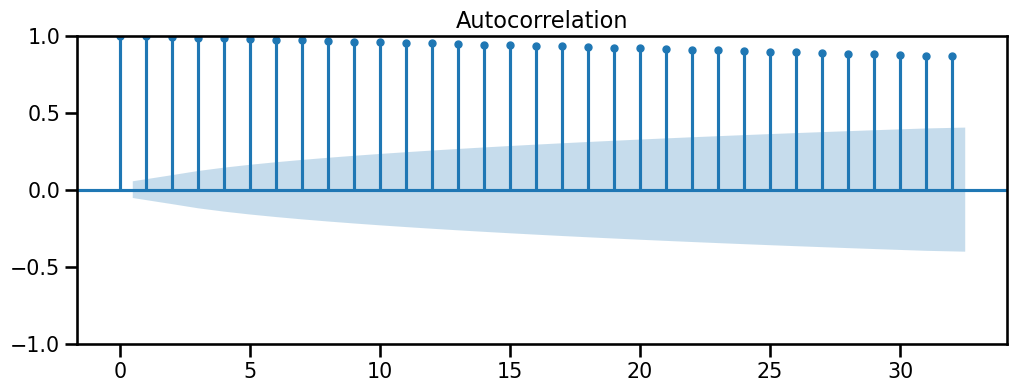

In [31]:
# Check for autocorrelation
fig = tsa.graphics.plot_acf(ts);

The data has significant autocorrelation.

#### 6. Difference the data once.

In [32]:
# Apply differencing 
ts_diff = ts.diff().dropna()
ts_diff.head()

Date
2010-01-05    0.009998
2010-01-06   -0.189999
2010-01-07   -0.320000
2010-01-08    0.209999
2010-01-11   -0.389999
Freq: B, Name: Closing Price, dtype: float64

#### 7. Visualize the differenced data

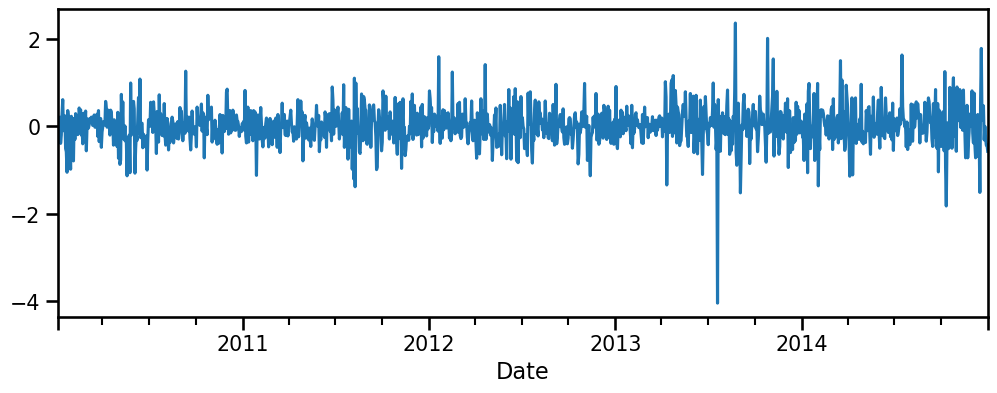

In [33]:
# Plot the differenced data
ts_diff.plot();

#### 8. Check the differenced data for stationarity with the Ad Fuller Test.

In [34]:
# Check differenced data for stationarity
# Check for stationarity with adfuller
adfuller_results = get_adfuller_results(ts_diff, label='differenced')
adfuller_results

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
differenced,-35.778578,0,1301,0.0,0.05,True


The differenced data is stationary.

#### 9. Check the differenced data for autocorrelation with an ACF Plot.

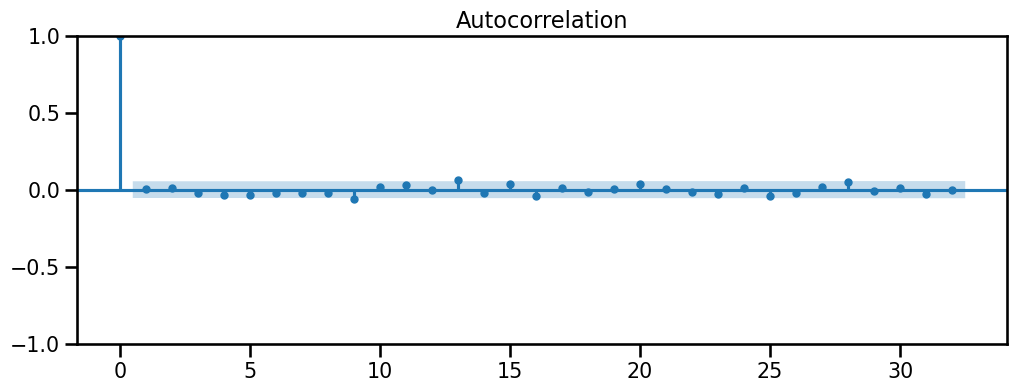

In [35]:
# Check differenced data for autocorrelation
fig = tsa.graphics.plot_acf(ts_diff);

Differencing eliminated the significant autocorrelation.